In [1]:
pip install geopandas


In [10]:
import pandas as pd
import geopandas as gdp
import matplotlib.pyplot as plt
%matplotlib inline

Adding Vector Data

In [59]:
municipality = gpd.read_file('municipality.shp')
municipality_geojson = gpd.read_file('municipality.geojson')

Reading Data

In [60]:
municipality.head()

,PROVINCE,PR_NAME,DISTRICT,PALIKA,TYPE,geometry
0,1,Province No 1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,Province No 1,TAPLEJUNG,Maiwakhola,Gaunpalika,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,Province No 1,TAPLEJUNG,Meringden,Gaunpalika,"POLYGON ((87.51233 27.56818, 87.51196 27.56768..."
3,1,Province No 1,TAPLEJUNG,Mikwakhola,Gaunpalika,"POLYGON ((87.6662 27.73004, 87.66659 27.73, 87..."
4,1,Province No 1,TAPLEJUNG,Phaktanglung,Gaunpalika,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [61]:
municipality.geom_type

,0
0,Polygon
1,Polygon
2,Polygon
3,Polygon
4,Polygon
...,...
770,Polygon
771,Polygon
772,Polygon
773,Polygon


In [56]:
municipality.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

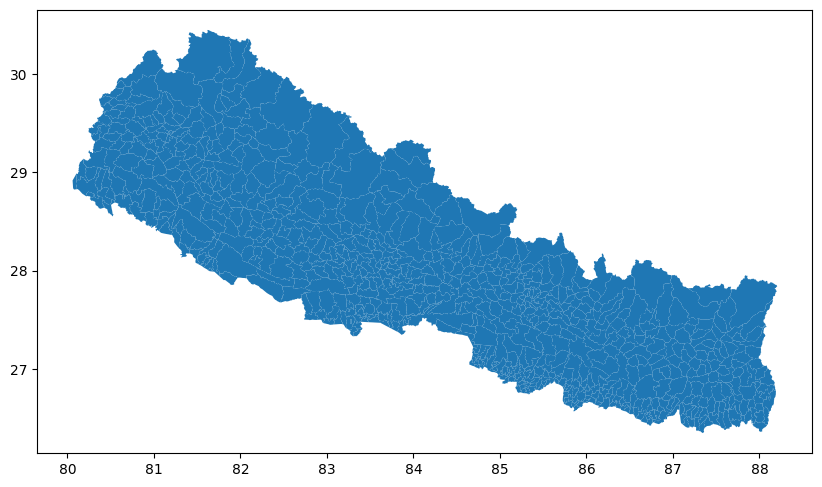

In [57]:
municipality.plot(figsize=(10,10))

<Axes: >

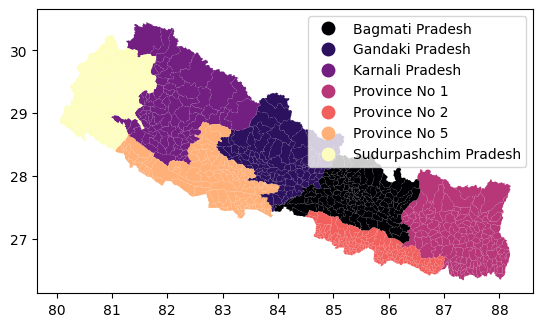

In [62]:
municipality.plot("PR_NAME",cmap='magma',legend=True)

Creating a finacial dataset

In [75]:
#Creating a mock financial dataset based on expected districts and structure
financial_data = pd.DataFrame({
    'DISTRICT': ['Gulmi', 'Palpa', 'Rupandehi', 'Arghakhanchi', 'Nawalpur', 'Kapilvastu', 'Dang', 'Bardiya', 'Syangja', 'Makwanpur'],
    'Avg Income': [70000, 55000, 60000, 65000, 58000, 61000, 59000, 62000, 57000, 54000],
    'Loan Defaults': [12, 8, 5, 7, 6, 9, 10, 3, 4, 11],
'Property Prices': [300000, 250000, 280000, 320000, 270000, 290000, 310000, 260000, 240000, 230000]
})

In [76]:
#Saving the mock finacial data to a CSV file
financial_data.to_csv('mock_financial_data.csv', index=False)

#Display the DataFrame.
print(financial_data)

       DISTRICT  Avg Income  Loan Defaults  Property Prices
0         Gulmi       70000             12           300000
1         Palpa       55000              8           250000
2     Rupandehi       60000              5           280000
3  Arghakhanchi       65000              7           320000
4      Nawalpur       58000              6           270000
5    Kapilvastu       61000              9           290000
6          Dang       59000             10           310000
7       Bardiya       62000              3           260000
8       Syangja       57000              4           240000
9     Makwanpur       54000             11           230000


In [77]:
# Printing the Unique District Values for the municipality data and finacial data
print("Unique DISTRICT values in municipality data:", municipality['DISTRICT'].unique())
print("Unique DISTRICT values in financial data:", financial_data['DISTRICT'].unique())


Unique DISTRICT values in municipality data: ['TAPLEJUNG' 'PANCHTHAR' 'ILAM' 'JHAPA' 'MORANG' 'SUNSARI' 'DHANKUTA'
 'TERHATHUM' 'SANKHUWASABHA' 'BHOJPUR' 'SOLUKHUMBU' 'OKHALDHUNGA'
 'KHOTANG' 'UDAYAPUR' 'SAPTARI' 'SIRAHA' 'DHANUSHA' 'MAHOTTARI' 'SARLAHI'
 'SINDHULI' 'RAMECHHAP' 'DOLAKHA' 'SINDHUPALCHOK' 'KABHREPALANCHOK'
 'LALITPUR' 'BHAKTAPUR' 'KATHMANDU' 'NUWAKOT' 'RASUWA' 'DHADING'
 'MAKAWANPUR' 'RAUTAHAT' 'BARA' 'PARSA' 'CHITAWAN' 'GORKHA' 'LAMJUNG'
 'TANAHU' 'SYANGJA' 'KASKI' 'MANANG' 'MUSTANG' 'MYAGDI' 'PARBAT' 'BAGLUNG'
 'GULMI' 'PALPA' 'NAWALPARASI_W' 'RUPANDEHI' 'KAPILBASTU' 'ARGHAKHANCHI'
 'PYUTHAN' 'ROLPA' 'RUKUM_W' 'SALYAN' 'DANG' 'BANKE' 'BARDIYA' 'SURKHET'
 'DAILEKH' 'JAJARKOT' 'DOLPA' 'JUMLA' 'KALIKOT' 'MUGU' 'HUMLA' 'BAJURA'
 'BAJHANG' 'ACHHAM' 'DOTI' 'KAILALI' 'KANCHANPUR' 'DADELDHURA' 'BAITADI'
 'DARCHULA' 'NAWALPARASI_E' 'RUKUM_E']
Unique DISTRICT values in financial data: ['Gulmi' 'Palpa' 'Rupandehi' 'Arghakhanchi' 'Nawalpur' 'Kapilvastu' 'Dang'
 'Bardiya' 'Syangja'

In [79]:
#Standardize DISTRICT names
municipality['DISTRICT'] = municipality['DISTRICT'].str.upper()
financial_data['DISTRICT'] = financial_data['DISTRICT'].str.upper()

# Printing columns of both dataframes to check for matching keys
print("municipality:", municipality.columns)
print("Financial columns:", financial_data.columns)

municipality: Index(['PROVINCE', 'PR_NAME', 'DISTRICT', 'PALIKA', 'TYPE', 'geometry'], dtype='object')
Financial columns: Index(['DISTRICT', 'Avg Income', 'Loan Defaults', 'Property Prices'], dtype='object')


In [80]:
#Merging datasets on 'DISTRICT'
merged_data = municipality.merge(financial_data, on='DISTRICT')

In [81]:
#Function to add grouped annotations
def annotate_grouped(ax, data):
    # Group by DISTRICT and get centroid
    grouped_data = data.dissolve(by='DISTRICT')
    for x, y, label in zip(grouped_data.geometry.centroid.x,
                            grouped_data.geometry.centroid.y,
                            grouped_data.index):
        ax.annotate(label, xy=(x, y), fontsize=10, ha='center', color='black',
                    xytext=(3, 3), textcoords='offset points',
                    bbox=dict(boxstyle="round,pad=0.3", edgecolor='none', facecolor='white'))


<ipython-input-81-abb78831c327>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(grouped_data.geometry.centroid.x,
<ipython-input-81-abb78831c327>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped_data.geometry.centroid.y,


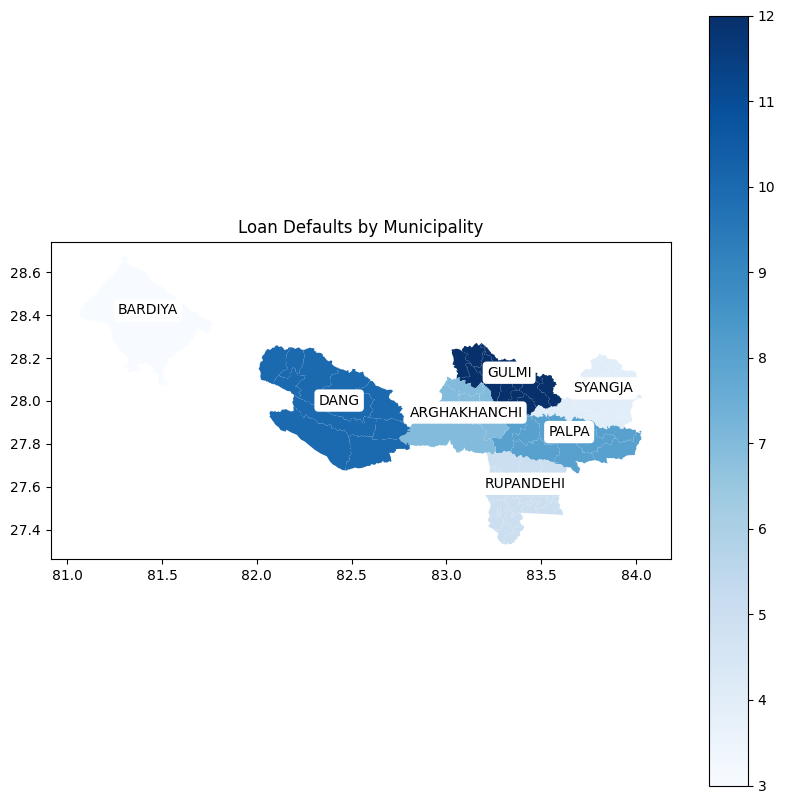

<ipython-input-81-abb78831c327>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(grouped_data.geometry.centroid.x,
<ipython-input-81-abb78831c327>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped_data.geometry.centroid.y,


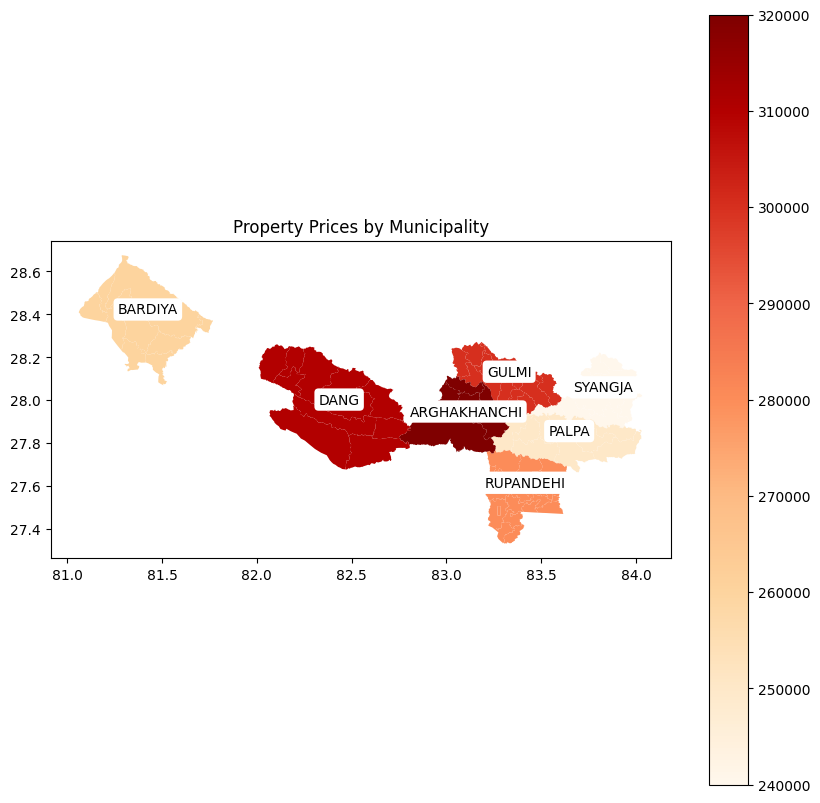

<ipython-input-81-abb78831c327>:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(grouped_data.geometry.centroid.x,
<ipython-input-81-abb78831c327>:6: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  grouped_data.geometry.centroid.y,


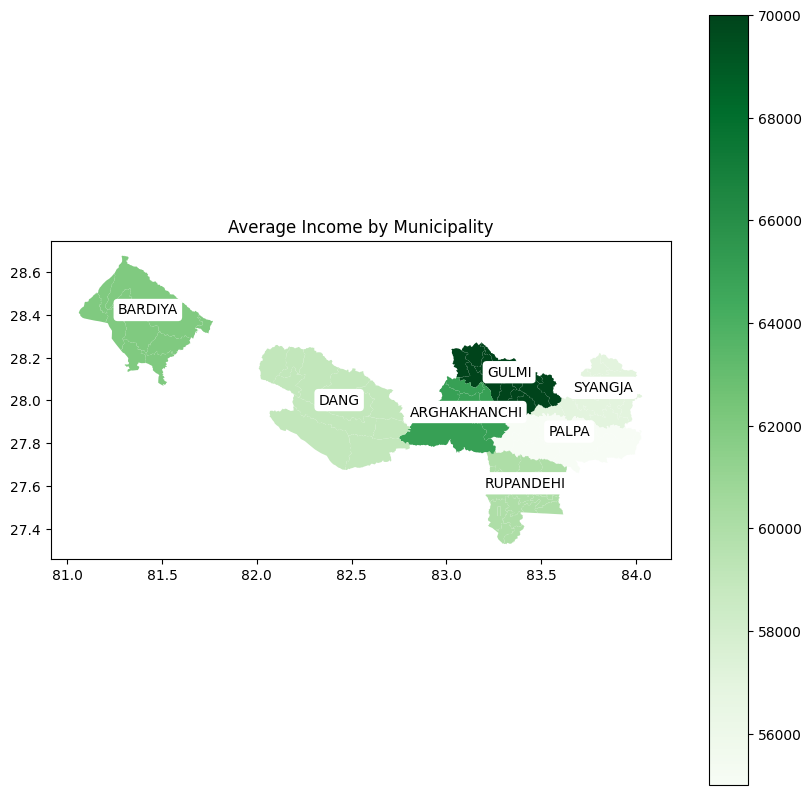

In [89]:
#Checking for valid geometries before plotting
if merged_data.is_valid.all():
    # Plot Loan Defaults
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_data.plot(column='Loan Defaults', cmap='Blues', legend=True, ax=ax)
    plt.title('Loan Defaults by Municipality')
    annotate_grouped(ax, merged_data)
    plt.show()

    # Plot Property Prices
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_data.plot(column='Property Prices', cmap='OrRd', legend=True, ax=ax)
    plt.title('Property Prices by Municipality')
    annotate_grouped(ax, merged_data)
    plt.show()

    # Plot Average Income
    fig, ax = plt.subplots(1, 1, figsize=(10, 10))
    merged_data.plot(column='Avg Income', cmap='Greens', legend=True, ax=ax)
    plt.title('Average Income by Municipality')
    annotate_grouped(ax, merged_data)
    plt.show()
else:
    print("Invalid geometries detected in merged data.")
